In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/peptide_files/AllQuantifiedPeptides_MSV000085937_HeLa_SingleCellProteomics.tsv', sep='\t')

In [3]:
df.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A1-calib,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A2-calib,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A3-calib,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A4-calib,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A5-calib,...,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B1-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B3-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B4-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B5-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B6-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B7-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B8-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B10-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B11-calib,Unnamed: 35
0,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,SRP14,Homo sapiens,2979.751421,8509.163398,0.0,6673.345433,0.000000,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAALQAK,AAAAAAALQAK,P36578;UNDEFINED,RPL4;,Homo sapiens;,358524.728516,141431.797802,0.0,0.000000,246906.633539,...,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,NaN
2,AAAEAAAEAK,AAAEAAAEAK,UNDEFINED,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
3,AAAEQAISVR,AAAEQAISVR,Q01780,EXOSC10,Homo sapiens,0.000000,20999.303507,0.0,21617.501607,0.000000,...,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,NaN
4,AAAEVAGQFVIK,AAAEVAGQFVIK,P02786;UNDEFINED,TFRC;,Homo sapiens;,25724.647705,55854.620419,0.0,0.000000,24233.017807,...,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,NaN


In [4]:
# we need to get the PGM1 protein and see if it's kind of looking the same. 

In [5]:
df_peptide_notshared = df[~df['Protein Groups'].str.contains(';')]
df_peptide_notshared 

df_peptide_shared = df[df['Protein Groups'].str.contains(';')]
df_peptide_shared

df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')
# df_peptide_shared[['Gene Names', 'gene_split']]

#expand the rows. the concat onto other df
df2_pep_shared = df_peptide_shared.explode('gene_split').reset_index(drop=True)
df2_pep_shared['Gene Names'] = df2_pep_shared['Gene Names'].str.split(';').str[0]
df2_pep_shared = df2_pep_shared[df2_pep_shared['gene_split'] != ""] #without this line protein that have the format AAX; are added twice

df_combined = pd.concat([df_peptide_notshared, df2_pep_shared])
df_combined

/var/folders/zk/jc657sbs27l7_q82ygdlvxxc0000gp/T/ipykernel_39349/226859099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')


,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A1-calib,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A2-calib,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A3-calib,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A4-calib,Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A5-calib,...,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B3-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B4-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B5-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B6-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B7-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B8-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B10-calib,Detection Type_NanoPOTS_FAIMS_HeLa_SC_Chip1_B11-calib,Unnamed: 35,gene_split
0,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,SRP14,Homo sapiens,2979.751421,8509.163398,0.000000,6673.345433,0.000000,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN,NaN
2,AAAEAAAEAK,AAAEAAAEAK,UNDEFINED,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN,NaN
3,AAAEQAISVR,AAAEQAISVR,Q01780,EXOSC10,Homo sapiens,0.000000,20999.303507,0.000000,21617.501607,0.000000,...,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,NaN,NaN
5,AAAEVNQDYGLDPK,AAAEVNQDYGLDPK,P07954,FH,Homo sapiens,16310.000793,0.000000,0.000000,0.000000,20826.995127,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,MBR,NaN,NaN
6,AAAFEQLQK,AAAFEQLQK,UNDEFINED,NaN,NaN,55427.684082,45715.505931,0.000000,0.000000,47555.560740,...,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,YVLGMQELFR,YVLGMQELFR,Q96J01;UNDEFINED,THOC3,Homo sapiens;,27891.375610,22836.427783,0.000000,0.000000,40111.174607,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN,THOC3
6165,YVYDSAFHPDTGEK,YVYDSAFHPDTGEK,Q9BWM7;UNDEFINED,SFXN3,Homo sapiens;,0.000000,0.000000,33745.441823,15175.100788,0.000000,...,MBR,NotDetected,MBR,NotDetected,MBR,MBR,MBR,MBR,NaN,SFXN3
6167,YYGGGSEGGR,YYGGGSEGGR,P14866;UNDEFINED,HNRNPL,Homo sapiens;,21457.647705,187184.111614,0.000000,149116.986504,18391.802214,...,MBR,MBR,MBR,MBR,MSMS,MBR,MBR,MBR,NaN,HNRNPL
6169,YYSEEAEVDLR,YYSEEAEVDLR,Q13769;UNDEFINED,THOC5,Homo sapiens;,9431.291565,8877.529728,0.000000,0.000000,9060.083799,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN,THOC5


In [6]:
df_combined.columns

Index(['Sequence', 'Base Sequence', 'Protein Groups', 'Gene Names', 'Organism',
       'Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A1-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A2-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A3-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A4-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_Lib_Chip1_A5-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_A11-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B1-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B3-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B4-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B5-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B6-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B7-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B8-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B10-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B11-calib',
       'Detection Type_NanoPOTS_FAIMS_HeLa

In [7]:
#how many proteins are there total?
df_combined = df_combined[['Gene Names','Sequence',
     'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_A11-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B1-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B3-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B4-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B5-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B6-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B7-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B8-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B10-calib',
       'Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B11-calib'
   ]]


In [8]:
#Calculates the total spectral count for each row. Will help to find examples
def calc_totals(row):
    total = 0
    if row[2] != 0:
        total += 1
    if row[3] != 0:
        total += 1
    if row[4] != 0:
        total += 1
    if row[5] != 0:
        total += 1
    if row[6] != 0:
        total += 1
    if row[7] != 0:
        total += 1
    if row[8] != 0:
        total += 1
    if row[9] != 0:
        total += 1
    if row[10] != 0:
        total += 1
    if row[11] != 0:
        total += 1

    return total


df_with_totals = df_combined.copy()
df_with_totals['Total_Count'] = df_with_totals.apply(calc_totals, axis = 1)
df_with_totals = df_with_totals[~df_with_totals['Gene Names'].isnull()]


In [9]:
df_with_totals

,Gene Names,Sequence,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_A11-calib,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B1-calib,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B3-calib,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B4-calib,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B5-calib,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B6-calib,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B7-calib,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B8-calib,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B10-calib,Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B11-calib,Total_Count
0,SRP14,AAAAAAAAAPAAAATAPTTAATTAATAAQ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,EXOSC10,AAAEQAISVR,14139.863484,39018.485983,15320.803835,28866.471514,31490.113826,40949.414579,36178.635150,26721.857670,43765.632543,20753.253883,10
5,FH,AAAEVNQDYGLDPK,0.000000,29263.054106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25251.166045,2
13,RBM39,AAAMANNLQK,31772.366040,33641.844529,46987.525551,0.000000,12062.547042,26068.473083,0.000000,0.000000,43503.224721,30276.451527,7
16,EEF1G,AAAPAPEEEMDEC[Common Fixed:Carbamidomethyl on ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,THOC3,YVLGMQELFR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
6165,SFXN3,YVYDSAFHPDTGEK,11543.282807,0.000000,17969.869300,0.000000,13980.009544,0.000000,11272.570952,12991.373182,10722.928459,13577.582427,7
6167,HNRNPL,YYGGGSEGGR,0.000000,58727.484061,105629.987947,65604.116799,77663.864444,53411.580954,88703.728531,85270.478674,91350.471486,70191.198296,9
6169,THOC5,YYSEEAEVDLR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [10]:
df_gene_ind = df_with_totals.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
df_gene_ind = df_gene_ind[df_gene_ind['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
df_gene_ind.sort_index()



Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_A11-calib  \
Gene Names Sequence                                                                                               
AARS1      GGYVLHIGTIYGDLK                                                                             0.000000   
           IVAVTGAEAQK                                                                             16211.657363   
AARS2      AQVC[Common Fixed:Carbamidomethyl on C]GGFILHEA...                                      44086.976142   
           QGLWLDVHALGELQR                                                                             0.000000   
ABCB10     VTQDSLAQATQLAEER                                                                            0.000000   
...                                                                                                         ...   
ZNF622     NVVAVGTGGR                                                                              21249.870924   
ZNF638     ETLGSEAVSSNVIDYGHASK                                                                        0.000000   
           IDLPEVQIEHDPELEK                                                                            0.000000   
           TSILAVSDVSSSKPSIK                                                                       13306.373018   
ZRANB2     LDEDEDEDDADLSK                                                                              0.000000   

                                                               Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B1-calib  \
Gene Names Sequence                                                                                              
AARS1      GGYVLHIGTIYGDLK                                                                            0.000000   
           IVAVTGAEAQK                                                                            22853.163135   
AARS2      AQVC[Common Fixed:Carbamidomethyl on C]GGFILHEA...                                         0.000000   
           QGLWLDVHALGELQR                                                                            0.000000   
ABCB10     VTQDSLAQATQLAEER                                                                           0.000000   
...                                                                                                        ...   
ZNF622     NVVAVGTGGR                                                                                 0.000000   
ZNF638     ETLGSEAVSSNVIDYGHASK                                                                       0.000000   
           IDLPEVQIEHDPELEK                                                                       12279.668723   
           TSILAVSDVSSSKPSIK                                                                          0.000000   
ZRANB2     LDEDEDEDDADLSK                                                                             0.000000   

                                                               Intensity_NanoPOTS_FAIMS_HeLa_SC_Chip1_B3-calib  \
Gene Names Sequence                                                                                              
AARS1      GGYVLHIGTIYGDLK                                                                            0.000000   
           IVAVTGAEAQK                                                                            14863.316868   
AARS2      AQVC[Common Fixed:Carbamidomethyl on C]GGFILHEA...                                         0.000000   
           QGLWLDVHALGELQR                                                                            0.000000   
ABCB10     VTQDSLAQATQLAEER                                                                           0.000000   
...                                                                                                        ...   
ZNF622     NVVAVGTGGR                                                                             30075.515448   
ZNF638     ETLGSEAVSSNVIDYGHASK                           

In [11]:
len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

1920

In [12]:
len(list(df_gene_ind.index.get_level_values('Sequence')))

7200

In [13]:
no_consistent= []
one_consistent = []
two_consistent = []
three_consistent = []
fourplus_consistent = []

num_proteins = 0

for gene, gene_df in df_gene_ind.groupby(level=0):
    num_proteins+=1
    #loop through each gene and count the number of consistent peptides
    if len(gene_df[gene_df['Total_Count'] == 10]) == 0:
        no_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 10]) == 1:
        one_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 10]) == 2:
#         import pdb; pdb.set_trace()
        two_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 10]) == 3:
        three_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 10]) >= 4:
        fourplus_consistent.append(gene)
        
    else:
        print('something is wrong')



In [14]:
len(fourplus_consistent)

138

In [15]:
len(three_consistent)

65

In [16]:
num_proteins

1920

In [17]:
'''
returns a dictionary where the key is the number of peptides, 
and the value is the number of proteins
Example: 5:4 would mean that 4 proteins consist of 5 peptides
'''
def get_num_pep_dict(df_with_totals, pep_consistency_list):
    subdf = df_with_totals[df_with_totals['Gene Names'].isin(pep_consistency_list)]
    subdf = subdf.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
    subdf = subdf[subdf['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
    subdf = subdf.sort_index()
    
    
    num_pep_consis = {}
    for gene, gene_df in subdf.groupby(level=0):
        num_peptides = len(gene_df)
        if num_peptides not in num_pep_consis.keys():    
            num_pep_consis[num_peptides] = 1
        else:
            num_pep_consis[num_peptides] += 1

    return num_pep_consis    

In [18]:
no_consis_d = get_num_pep_dict(df_with_totals, no_consistent)
one_consis_d = get_num_pep_dict(df_with_totals, one_consistent)
two_consis_d = get_num_pep_dict(df_with_totals, two_consistent)
three_consis_d = get_num_pep_dict(df_with_totals, three_consistent)
fourplus_consis_d = get_num_pep_dict(df_with_totals, fourplus_consistent)


In [19]:
no_consis_d

{2: 279,
 1: 722,
 5: 51,
 4: 84,
 3: 148,
 10: 9,
 6: 23,
 7: 19,
 8: 4,
 25: 1,
 13: 2,
 17: 2,
 19: 1,
 11: 1}

## make figure

In [20]:
num_pep_0consis_series = pd.Series(no_consis_d)
num_pep_1consis_series = pd.Series(one_consis_d)
num_pep_2consis_series = pd.Series(two_consis_d)
num_pep_3consis_series = pd.Series(three_consis_d)
num_pep_4plusconsis_series = pd.Series(fourplus_consis_d)

In [21]:
plotdf = pd.concat([num_pep_0consis_series,
           num_pep_1consis_series,
          num_pep_2consis_series,
          num_pep_3consis_series,
          num_pep_4plusconsis_series],axis=1)


plotdf.rename({0:'0',
              1:'1',
              2:'2',
              3:'3',
              4:'4'}, axis=1, inplace=True)

plotdf = plotdf.sort_index()

In [22]:
plotdf.head() #index is the number of peptides in a protein. Values are the number of proteins

,0,1,2,3,4
1,722.0,58.0,NaN,NaN,NaN
2,279.0,63.0,12.0,NaN,NaN
3,148.0,47.0,17.0,9.0,NaN
4,84.0,26.0,13.0,8.0,1.0
5,51.0,25.0,12.0,7.0,8.0


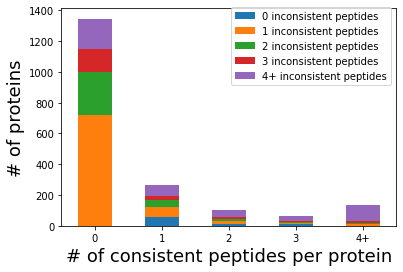

In [23]:
plotdf = plotdf.reset_index()

melted = pd.melt(plotdf, id_vars='index', value_vars=plotdf.columns.tolist())
melted.rename({'variable':'category', 'index':'total_peptides', 'value':'num_proteins'}, axis=1, inplace=True)
melted = melted[melted['num_proteins'].notnull()]
melted.head()

# make a boxplot
#each row is a protein
#y axis is the number of inconsistent
#x axis is the category

plot4 = melted.copy()
plot4



def get_inconsistent_count(row):
    num_consistent = int(row['category'].split(' ')[0])        
    num_total = row['total_peptides']
    if num_consistent == num_total:
        return 0
    else:
        num_inconsistent  = num_total - num_consistent
        return num_inconsistent
    
plot4 = melted.copy()
plot4['inconsistent_count'] = plot4.apply(get_inconsistent_count, axis=1)
plot4 = plot4.sort_values('category')
plot4.replace('4 consistent peptide', '4+ consistent peptide', inplace=True)
plot4.replace('4', '4+', inplace=True)


plot4.drop(columns='total_peptides', inplace=True)

plot4 = plot4.groupby(['category', 'inconsistent_count'])['num_proteins'].sum().unstack().fillna(0)

#format to deal with 4+
above4 = list(plot4.columns)
above4 = [x for x in above4 if x >= 4]
plot4['4+'] = plot4[above4].sum(axis=1)
plot4.drop(columns=above4, axis=1,inplace=True)

plot4 = plot4.rename({0:'0 inconsistent peptides',
             1:'1 inconsistent peptides',
             2:'2 inconsistent peptides',
             3:'3 inconsistent peptides',
             '4+':'4+ inconsistent peptides'}, axis=1)
plot4


from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
ax = plot4.plot(kind='bar', stacked=True)

plt.xticks(rotation=0, ha='center')

ax.legend(bbox_to_anchor=(1., 1.03))

plt.xlabel('# of consistent peptides per protein', fontsize=18)
plt.ylabel('# of proteins', fontsize=18)
plt.savefig('stacked_bar_chart.png', dpi=600, bbox_inches = "tight")

plt.show()

In [24]:
plotdf.sum()

index    1157.0
0        1346.0
1         268.0
2         103.0
3          65.0
4         138.0
dtype: float64

In [25]:
num_prot = len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

In [26]:
num_prot

1920

In [27]:
print('0 consistent: ' + str(round(229/num_prot*100, 2)))
print('1 consistent: ' + str(round(241/num_prot*100, 2)))
print('2 consistent: ' + str(round(79/num_prot*100,2)))
print('3 consistent: ' + str(round(31/num_prot*100,2)))
print('4+ consistent: ' + str(round(45/num_prot*100,2)))

0 consistent: 11.93
1 consistent: 12.55
2 consistent: 4.11
3 consistent: 1.61
4+ consistent: 2.34


In [28]:
268+103+65+138

574